In [30]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

In [40]:
# Load Generated Dataset (From DataGenerator_v5)
print("Reading CSV...")
df = pd.read_csv('../../dataset_grouped_by_day.csv')

print("Done!")

Reading CSV...
Done!


In [41]:
df2 = df.copy()
df2 = df2.drop(df2.columns.difference(['timeFrom','TotalParkings']), axis=1)

df2 = df2.set_index('timeFrom')
pd.to_datetime(df2.index, errors='ignore')
df2

,TotalParkings
timeFrom,
2013-01-01,290
2013-01-02,635
2013-01-03,597
2013-01-04,594
2013-01-05,274
...,...
2017-12-27,832
2017-12-28,749
2017-12-29,788


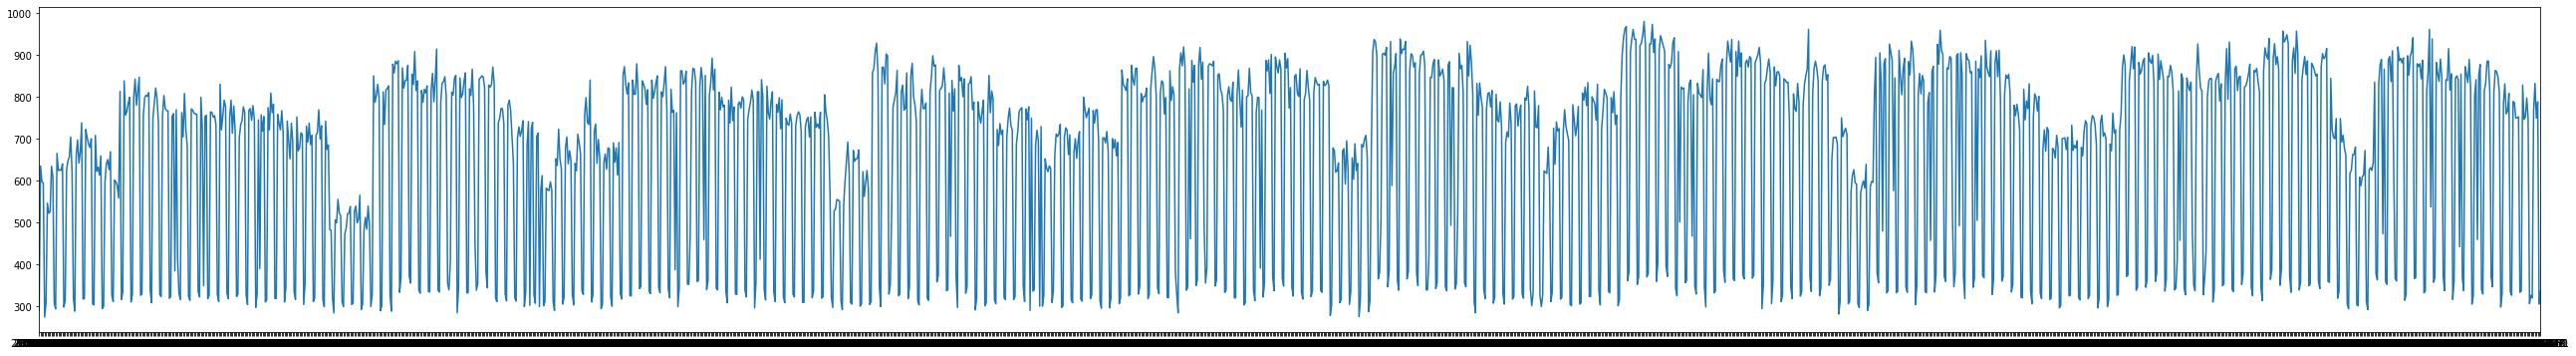

In [44]:
plt.subplots(figsize=(45,6))
plt.margins(x=0)
plt.figure(1).set_facecolor((1, 1, 1))
plt.plot(df2)

In [59]:
train_size = int(len(df2) * 0.9)
test_size = len(df2) - train_size
train, test = df2.iloc[0:train_size], df2.iloc[train_size:len(df)]
print(len(train), len(test))

1643 183


In [60]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [55]:
time_steps = 7

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.TotalParkings, time_steps)
X_test, y_test = create_dataset(test, test.TotalParkings, time_steps)

print(X_train.shape, y_train.shape)

(1636, 7, 1) (1636,)


In [57]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=128,
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [58]:
history = model.fit(
    X_train, y_train,
    epochs=250,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 1472 samples, validate on 164 samples
Epoch 1/250
1472/1472 [==============================] - 2s 2ms/sample - loss: 458649.7150 - val_loss: 508413.4345
Epoch 2/250
1472/1472 [==============================] - 1s 506us/sample - loss: 454819.3908 - val_loss: 504658.4924
Epoch 3/250
1472/1472 [==============================] - 1s 505us/sample - loss: 451300.9276 - val_loss: 500966.8232
Epoch 4/250
1472/1472 [==============================] - 1s 506us/sample - loss: 447826.4188 - val_loss: 497310.6646
Epoch 5/250
1472/1472 [==============================] - 1s 501us/sample - loss: 444382.4721 - val_loss: 493683.0488
Epoch 6/250
1472/1472 [==============================] - 1s 507us/sample - loss: 440964.7833 - val_loss: 490081.0221
Epoch 7/250
1472/1472 [==============================] - 1s 501us/sample - loss: 437571.2368 - val_loss: 486502.8918
Epoch 8/250
1472/1472 [==============================] - 1s 517us/sample - loss: 434200.5805 - val_loss: 482947.6845
Epoch 9/250
1472/14

1472/1472 [==============================] - 1s 555us/sample - loss: 258985.3331 - val_loss: 296496.7378
Epoch 71/250
1472/1472 [==============================] - 1s 541us/sample - loss: 256635.7220 - val_loss: 293968.4017
Epoch 72/250
1472/1472 [==============================] - 1s 601us/sample - loss: 254300.2775 - val_loss: 291454.3346
Epoch 73/250
1472/1472 [==============================] - 1s 550us/sample - loss: 251979.0504 - val_loss: 288954.5922
Epoch 74/250
1472/1472 [==============================] - 1s 522us/sample - loss: 249672.0721 - val_loss: 286469.2355
Epoch 75/250
1472/1472 [==============================] - 1s 544us/sample - loss: 247379.3307 - val_loss: 283998.1025
Epoch 76/250
1472/1472 [==============================] - 1s 527us/sample - loss: 245100.7772 - val_loss: 281541.2393
Epoch 77/250
1472/1472 [==============================] - 1s 537us/sample - loss: 242836.4286 - val_loss: 279098.7607
Epoch 78/250
1472/1472 [==============================] - 1s 583us/sa

1472/1472 [==============================] - 1s 518us/sample - loss: 129720.6417 - val_loss: 155134.2073
Epoch 140/250
1472/1472 [==============================] - 1s 516us/sample - loss: 128329.1766 - val_loss: 153572.0736
Epoch 141/250
1472/1472 [==============================] - 1s 515us/sample - loss: 126951.1952 - val_loss: 152023.5227
Epoch 142/250
1472/1472 [==============================] - 1s 500us/sample - loss: 125586.6767 - val_loss: 150488.6456
Epoch 143/250
1472/1472 [==============================] - 1s 508us/sample - loss: 124235.6449 - val_loss: 148967.4059
Epoch 144/250
1472/1472 [==============================] - 1s 510us/sample - loss: 122898.0081 - val_loss: 147459.7832
Epoch 145/250
1472/1472 [==============================] - 1s 528us/sample - loss: 121573.8541 - val_loss: 145965.8026
Epoch 146/250
1472/1472 [==============================] - 1s 529us/sample - loss: 120263.0580 - val_loss: 144485.4840
Epoch 147/250
1472/1472 [==============================] - 1s 

1472/1472 [==============================] - 1s 493us/sample - loss: 64225.3237 - val_loss: 78512.0901
Epoch 209/250
1472/1472 [==============================] - 1s 487us/sample - loss: 63706.3143 - val_loss: 77847.0819
Epoch 210/250
1472/1472 [==============================] - 1s 490us/sample - loss: 63198.4450 - val_loss: 77193.9773
Epoch 211/250
1472/1472 [==============================] - 1s 489us/sample - loss: 62701.7616 - val_loss: 76552.7095
Epoch 212/250
1472/1472 [==============================] - 1s 490us/sample - loss: 62216.1406 - val_loss: 75923.2847
Epoch 213/250
1472/1472 [==============================] - 1s 484us/sample - loss: 61741.5263 - val_loss: 75305.6393
Epoch 214/250
1472/1472 [==============================] - 1s 504us/sample - loss: 61277.8782 - val_loss: 74699.6220
Epoch 215/250
1472/1472 [==============================] - 1s 527us/sample - loss: 60825.0424 - val_loss: 74105.1864
Epoch 216/250
1472/1472 [==============================] - 1s 490us/sample - l

In [61]:
y_pred = model.predict(X_test)

y_pred

array([[594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
       [594.18945],
